# MERRION EAST AND WEST STATION MODELLING


Data Source: Manually extraced the datas for Merrion east and west stations from the available datasets(dublinbike_datasets)
combined in new Excel sheet
spli the data for modelling
datafile name : data


In [59]:
# importing the library functions

In [ ]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn.feature_selection import SelectKBest

from operator import itemgetter

%matplotlib inline

#Loading and Partition of Data

In [65]:
dataset = pd.read_csv('data/Book1.csv')
dataset.head()
#dataset.info()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,25,4/1/2019 0:00,3/31/2019 23:52,MERRION SQUARE EAST,30,28,2,Open,Merrion Square East,53.339436,-6.246548
1,25,4/1/2019 0:05,4/1/2019 0:02,MERRION SQUARE EAST,30,28,2,Open,Merrion Square East,53.339436,-6.246548
2,25,4/1/2019 0:10,4/1/2019 0:02,MERRION SQUARE EAST,30,28,2,Open,Merrion Square East,53.339436,-6.246548
3,25,4/1/2019 0:15,4/1/2019 0:12,MERRION SQUARE EAST,30,28,2,Open,Merrion Square East,53.339436,-6.246548
4,25,4/1/2019 0:20,4/1/2019 0:12,MERRION SQUARE EAST,30,28,2,Open,Merrion Square East,53.339436,-6.246548


In [66]:
dataset.tail()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
2057,26,1/1/2020 20:00,1/1/2020 19:52,MERRION SQUARE WEST,20,9,11,Open,Merrion Square West,53.339764,-6.251988
2058,26,1/1/2020 20:05,1/1/2020 20:02,MERRION SQUARE WEST,20,9,11,Open,Merrion Square West,53.339764,-6.251988
2059,26,1/1/2020 20:10,1/1/2020 20:05,MERRION SQUARE WEST,20,8,12,Open,Merrion Square West,53.339764,-6.251988
2060,26,1/1/2020 20:15,1/1/2020 20:13,MERRION SQUARE WEST,20,9,11,Open,Merrion Square West,53.339764,-6.251988
2061,26,1/1/2020 20:20,1/1/2020 20:17,MERRION SQUARE WEST,20,9,11,Open,Merrion Square West,53.339764,-6.251988


In [ ]:
dataset["NAME"].value_counts()
dataset["BIKE STANDS"].value_counts()
dataset["AVAILABLE BIKE STANDS"].value_counts()
dataset["AVAILABLE BIKES"].value_counts()
dataset["STATUS"].value_counts()
dataset["ADDRESS"].value_counts()
dataset["LATITUDE"].value_counts()
dataset["LONGITUDE"].value_counts()
dataset["STATION ID"].value_counts()
dataset["LAST UPDATED"].value_counts()
dataset["TIME"].value_counts()

In [39]:

display(dataset.select_dtypes(include=[np.number]).describe().transpose())
display(dataset.select_dtypes(include=[np.object]).describe().transpose())

,count,mean,std,min,25%,50%,75%,max
STATION ID,2062.0,25.500000,0.500121,25.000000,25.000000,25.500000,26.000000,26.000000
BIKE STANDS,2062.0,25.000000,5.001213,20.000000,20.000000,25.000000,30.000000,30.000000
AVAILABLE BIKE STANDS,2062.0,13.681862,9.557997,0.000000,5.000000,13.000000,20.000000,30.000000
AVAILABLE BIKES,2062.0,11.293404,8.870011,0.000000,3.000000,11.000000,17.000000,30.000000
LATITUDE,2062.0,53.339600,0.000164,53.339436,53.339436,53.339600,53.339764,53.339764
LONGITUDE,2062.0,-6.249268,0.002721,-6.251988,-6.251988,-6.249268,-6.246548,-6.246548


,count,unique,top,freq
TIME,2062,1031,1/1/2020 12:45,2
LAST UPDATED,2062,1196,7/9/2019 10:44,5
NAME,2062,2,MERRION SQUARE EAST,1031
STATUS,2062,1,Open,2062
ADDRESS,2062,2,Merrion Square East,1031


##Split the data into a training set, a vaidation set, and a test set

In [40]:
X=dataset[['BIKE STANDS','AVAILABLE BIKE STANDS','LATITUDE','LONGITUDE','STATION ID']]
Y=dataset["AVAILABLE BIKES"]

In [41]:
# splitting the data
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

[Text(143.0746875, 205.35999999999999, 'X[1] <= 6.5\nentropy = 4.423\nsamples = 1030\nvalue = [154, 67, 42, 17, 12, 10, 19, 18, 81, 38, 55, 83\n67, 27, 21, 23, 33, 24, 21, 39, 41, 6, 6, 8, 4\n6, 4, 4, 15, 46, 39]'),
 Text(40.28062500000001, 181.2, 'X[1] <= 1.5\nentropy = 3.483\nsamples = 295\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n18, 19, 26, 24, 19, 34, 37, 0, 0, 0, 4, 6, 4\n4, 15, 46, 39]'),
 Text(16.740000000000002, 157.04, 'X[0] <= 25.0\nentropy = 2.034\nsamples = 157\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 34, 37, 0, 0, 0, 0, 0, 0, 0\n1, 46, 39]'),
 Text(8.370000000000001, 132.88, 'X[1] <= 0.5\nentropy = 0.999\nsamples = 71\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 34, 37, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(4.1850000000000005, 108.72, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 37, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(12.555000000000001, 108.72, 'entropy = 0

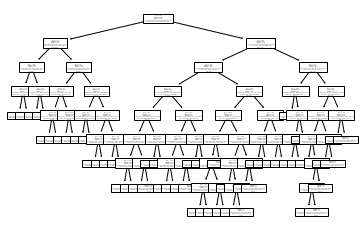

In [44]:
# Prediction model- decision tree classifier
my_tree = tree.DecisionTreeClassifier(criterion="entropy")
my_tree.fit(X_train,y_train)
my_tree_fit=my_tree.fit(X_train,y_train)

# to plot 
tree.plot_tree(my_tree_fit)

In [45]:
# Do the same job with random forests - will do if it later
#my_model = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
#my_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        min_samples_leaf=50))

In [46]:

# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

# Print nicer homemade confusion matrix
print("Confusion Matrix")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9815533980582525
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        12
           5       1.00      0.80      0.89        10
           6       0.89      0.84      0.86        19
           7       0.85      0.94      0.89        18
           8       0.99      1.00      0.99        81
           9       1.00      0.92      0.96        38
          10       0.95      0.96      0.95        55
          11       0.98      0.99      0.98        83
          12       0.99      1.00      0.99        67
          13       1.00      1.00      1.00        27
          14       1.00      0.95      0.98        21
          15       0.96      0.96      0.96        23
          16       0.97      1.00      0.99        3

Predicted,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,All
True,,,,,,,,,,,,,,,,,,,,,
0,154,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,154
1,0,67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67
2,0,0,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
3,0,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4,0,0,0,0,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
5,0,0,0,0,0,8,2,0,0,0,...,0,0,0,0,0,0,0,0,0,10
6,0,0,0,0,0,0,16,3,0,0,...,0,0,0,0,0,0,0,0,0,19
7,0,0,0,0,0,0,0,17,1,0,...,0,0,0,0,0,0,0,0,0,18
8,0,0,0,0,0,0,0,0,81,0,...,0,0,0,0,0,0,0,0,0,81


In [47]:

# Make a set of predictions for the validation data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_valid, y_pred))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9709443099273608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      0.67      0.80         3
           6       0.90      0.75      0.82        12
           7       0.62      0.83      0.71         6
           8       0.97      0.97      0.97        29
           9       0.91      1.00      0.95        10
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      0.93      0.96        14
          16       0.83      1.00      0.91        1

Predicted,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,27,28,29,30,All
True,,,,,,,,,,,,,,,,,,,,,
0,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
1,0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
2,0,0,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
3,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,9,3,0,0,...,0,0,0,0,0,0,0,0,0,12
7,0,0,0,0,0,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,6
8,0,0,0,0,0,0,0,0,28,1,...,0,0,0,0,0,0,0,0,0,29


In [ ]:
# Train multiple trees using different tree depths looking out for overfitting

train_accuracies = list()
valid_accuracies = list()

maxDepth = 20

for i in range(1, maxDepth):

    print ("***" + str(i))

    # Train a decision tree
    my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_leaf = 20)
    my_tree = my_tree.fit(X_train,y_train)

    # visualise the decision tree
    # feature_names = list(X_train.columns)
     # fileName = "dt_" + str(i) + ".png"
     # visualize_tree(my_tree, feature_names, fileName)
     # Image(filename=fileName) 
    
    # Make a set of predictions for the training data
    y_pred = my_tree.predict(X_train)
    # Print performance details
    #print(classification_report(y_train, y_pred))
    train_accuracy = metrics.accuracy_score(y_train, y_pred)
    print("Training Accuracy: " + str(train_accuracy))
    train_accuracies.append(train_accuracy)
        
    # Make a set of predictions for the test data
    y_pred = my_tree.predict(X_valid)
    # Print performance details
    #print(classification_report(y_test, y_pred))
    valid_accuracy = metrics.accuracy_score(y_valid, y_pred)
    print("Validation Accuracy: " + str(valid_accuracy))
    valid_accuracies.append(valid_accuracy)

Text(0.5, 0, 'Complexity')

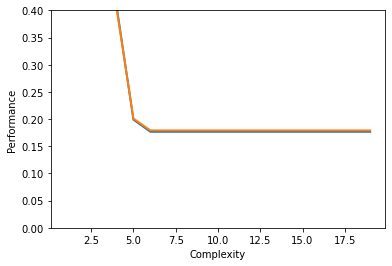

In [50]:
# To plot 
plt.plot(range(1, maxDepth), [1 - x for x in train_accuracies], linewidth=2)
plt.plot(range(1, maxDepth), [1 - x for x in valid_accuracies], linewidth=2)
plt.ylim((0,0.4))
plt.ylabel('Performance')
plt.xlabel('Complexity')

In [51]:
# To find the best depth
best_depth = valid_accuracies.index(max(valid_accuracies))
print("Best valid misclassification rate: " + str(1 - max(valid_accuracies)))
print("Best depth: " + str(best_depth))

Best valid misclassification rate: 0.17917675544794187
Best depth: 5


In [52]:

# Train a decision tree
my_best_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=best_depth, min_samples_leaf = 20)
my_best_tree = my_tree.fit(X_train,y_train)

print("Training Data")

# Make a set of predictions for the training data
y_pred = my_best_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

print("Validation Data")

# Make a set of predictions for the test data
y_pred = my_best_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Training Data
Accuracy: 0.8233009708737864
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      0.78      0.87        67
           2       0.89      0.76      0.82        42
           3       0.33      0.76      0.46        17
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        10
           6       0.47      0.79      0.59        19
           7       0.00      0.00      0.00        18
           8       0.96      1.00      0.98        81
           9       0.82      0.61      0.70        38
          10       0.74      0.96      0.83        55
          11       0.80      0.99      0.88        83
          12       0.64      1.00      0.78        67
          13       0.53      0.59      0.56        27
          14       0.82      0.86      0.84        21
          15       0.76      0.83      0.79        23
          16       0.87      0.79     

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,0,1,2,3,6,8,9,10,11,12,...,14,15,16,17,18,19,20,29,30,All
True,,,,,,,,,,,,,,,,,,,,,
0,154,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,154
1,0,52,0,0,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,67
2,0,0,32,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,42
3,0,0,4,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4,0,0,0,9,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
5,0,0,0,6,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
6,0,0,0,4,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
7,0,0,0,7,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
8,0,0,0,0,0,81,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Data
Accuracy: 0.8208232445520581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.95      0.97        19
           2       0.90      0.78      0.84        23
           3       0.23      0.71      0.34         7
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         3
           6       0.60      0.50      0.55        12
           7       0.00      0.00      0.00         6
           8       0.97      0.97      0.97        29
           9       1.00      0.90      0.95        10
          10       0.86      1.00      0.92        18
          11       0.88      1.00      0.93        28
          12       0.65      1.00      0.78        40
          13       0.56      0.56      0.56         9
          14       0.69      0.90      0.78        10
          15       0.71      0.86      0.77        14
          16       1.00      1.00   

Predicted,0,1,2,3,6,8,9,10,11,12,...,14,15,16,17,18,19,20,29,30,All
True,,,,,,,,,,,,,,,,,,,,,
0,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
1,0,18,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19
2,0,0,18,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,23
3,0,0,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
7,0,0,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
8,0,0,0,0,0,28,0,1,0,0,...,0,0,0,0,0,0,0,0,0,29


[Text(147.87, 201.90857142857143, 'X[1] <= 6.5\nentropy = 4.423\nsamples = 1030\nvalue = [154, 67, 42, 17, 12, 10, 19, 18, 81, 38, 55, 83\n67, 27, 21, 23, 33, 24, 21, 39, 41, 6, 6, 8, 4\n6, 4, 4, 15, 46, 39]'),
 Text(59.52, 170.84571428571428, 'X[1] <= 1.5\nentropy = 3.483\nsamples = 295\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n18, 19, 26, 24, 19, 34, 37, 0, 0, 0, 4, 6, 4\n4, 15, 46, 39]'),
 Text(29.76, 139.78285714285715, 'X[0] <= 25.0\nentropy = 2.034\nsamples = 157\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 34, 37, 0, 0, 0, 0, 0, 0, 0\n1, 46, 39]'),
 Text(14.88, 108.72, 'X[1] <= 0.5\nentropy = 0.999\nsamples = 71\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 34, 37, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(7.44, 77.65714285714284, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 37, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(22.32, 77.65714285714284, 'entropy = 0.0\nsamples = 34\nvalu

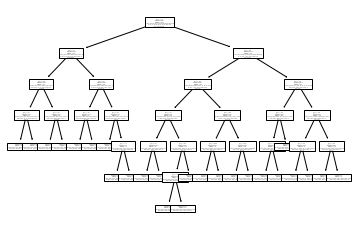

In [53]:

# visualise the decision tree
tree.plot_tree(my_best_tree) 

In [55]:

my_tree = tree.DecisionTreeClassifier(max_depth = 5)
scores = cross_val_score(my_tree, X_train_plus_valid, y_train_plus_valid, cv=5)
print(scores)

[0.60899654 0.60899654 0.56747405 0.59722222 0.54513889]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [56]:
#
my_tree.fit(X_train_plus_valid, y_train_plus_valid)
my_tree.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [58]:
#
# Make a set of predictions for the test data
y_pred = my_best_tree.predict(X_test)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      0.74      0.85        39
           2       0.93      0.93      0.93        29
           3       0.27      0.83      0.41        12
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         5
           6       0.38      0.53      0.44        15
           7       0.00      0.00      0.00        17
           8       0.93      1.00      0.97        42
           9       1.00      0.69      0.81        16
          10       0.81      0.96      0.88        27
          11       0.78      1.00      0.88        54
          12       0.69      0.93      0.79        43
          13       0.55      0.58      0.56        19
          14       0.36      0.83      0.50         6
          15       0.94      0.84      0.89        19
          16       0.90      1.00      0.95        18
          17       0.86    

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,0,1,2,3,6,8,9,10,11,12,...,14,15,16,17,18,19,20,29,30,All
True,,,,,,,,,,,,,,,,,,,,,
0,83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,83
1,0,29,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,39
2,0,0,27,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,29
3,0,0,2,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4,0,0,0,10,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
5,0,0,0,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,7,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
7,0,0,0,7,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
8,0,0,0,0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
